In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import pycountry_convert as pc

# Data Cleaning

In [82]:
education = pd.read_csv('educational_attainment - Sheet1.csv')

education

,Country,All Adults,Less than 9th Grade,9th-12th Grade,High School Diploma or Equivalent,Some College or Associate's Degree,Bachelor's Degree or Higher
0,U.S. Born,"189,038,000",2%,5%,27%,30%,36%
1,All immigrants,"40,741,000",16%,9%,22%,18%,35%
2,Recently Arrived Immigrants,"1,945,000",12%,7%,19%,13%,48%
3,Mexico,"288,000",27%,15%,24%,11%,24%
4,India,"215,000",3%,3%,4%,4%,86%
5,China/Hong Kong,"94,000",9%,4%,17%,11%,60%
6,Venezuela,"84,000",6%,4%,22%,22%,46%
7,Cuba,"68,000",4%,16%,37%,15%,28%
8,Colombia,"67,000",8%,5%,22%,21%,44%
9,Brazil,"60,000",10%,6%,25%,10%,49%


In [83]:
education.columns

Index(['Country', 'All Adults', 'Less than 9th Grade', '9th-12th Grade',
       'High School Diploma or Equivalent',
       'Some College or Associate's Degree', 'Bachelor's Degree or Higher'],
      dtype='object')

In [84]:
def remove_percent(df, columns):
    for column in columns:
        df[column] = df[column].str.replace('%', '').astype(float)
    return df

# List of columns to remove '%' from
columns_to_remove_percent = ['Less than 9th Grade', '9th-12th Grade',
       'High School Diploma or Equivalent',
       "Some College or Associate's Degree", "Bachelor's Degree or Higher"]

# Apply the function
df_cleaned = remove_percent(education.copy(), columns_to_remove_percent)

df_cleaned

,Country,All Adults,Less than 9th Grade,9th-12th Grade,High School Diploma or Equivalent,Some College or Associate's Degree,Bachelor's Degree or Higher
0,U.S. Born,"189,038,000",2.0,5.0,27.0,30.0,36.0
1,All immigrants,"40,741,000",16.0,9.0,22.0,18.0,35.0
2,Recently Arrived Immigrants,"1,945,000",12.0,7.0,19.0,13.0,48.0
3,Mexico,"288,000",27.0,15.0,24.0,11.0,24.0
4,India,"215,000",3.0,3.0,4.0,4.0,86.0
5,China/Hong Kong,"94,000",9.0,4.0,17.0,11.0,60.0
6,Venezuela,"84,000",6.0,4.0,22.0,22.0,46.0
7,Cuba,"68,000",4.0,16.0,37.0,15.0,28.0
8,Colombia,"67,000",8.0,5.0,22.0,21.0,44.0
9,Brazil,"60,000",10.0,6.0,25.0,10.0,49.0


In [85]:
children = pd.read_csv("Unnacompanied_children - Sheet1.csv")

children

,State,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021,FY 2022,FY 2023 YTD*,FY 2014 - 2023 YTD* Total
0,United States,"53,515","27,840","52,147","42,497","34,953","72,837","16,837","107,686","127,447","101,871","637,630"
1,Alabama,786,808,870,598,736,"1,111",247,"1,946","2,378","1,821","11,301"
2,Alaska,4,2,5,3,-,4,-,4,6,6,34
3,Arizona,295,167,330,322,258,493,162,631,782,762,"4,202"
4,Arkansas,307,186,309,272,193,359,87,790,926,788,"4,217"
5,California,"5,831","3,629","7,381","6,268","4,675","8,447","2,225","10,773","13,730","10,073","73,032"
6,Colorado,426,248,427,379,313,714,172,"1,088","1,424","1,430","6,621"
7,Connecticut,552,206,454,412,332,959,260,"1,447","1,302","1,114","7,038"
8,Delaware,212,152,275,178,222,383,107,519,573,470,"3,091"
9,District of Columbia,375,201,432,294,138,322,48,307,421,312,"2,850"


In [86]:
refugees = pd.read_csv("Refugge_resettlement - Sheet1.csv")

refugees

,Year,Annual Ceiling,Number of Admitted Refugees
0,1975,-,"146,158"
1,1976,-,"27,206"
2,1977,-,"19,946"
3,1978,-,"36,507"
4,1979,-,"111,363"
5,1980,"231,700","207,116"
6,1981,"217,000","159,252"
7,1982,"140,000","98,096"
8,1983,"90,000","61,218"
9,1984,"72,000","70,393"


In [87]:
immigrant_state = pd.read_csv("Immigrant_pop_state - Sheet1.csv")

immigrant_state

,Country,Total Population,Immigrant Population,Immigrant Share of Total State Population,Year
0,United States,"248,709,900","19,767,300",7.90%,1990
1,Alabama,"4,040,600","43,500",1.10%,1990
2,Alaska,"550,000","24,800",4.50%,1990
3,Arizona,"3,665,200","278,200",7.60%,1990
4,Arkansas,"2,350,700","24,900",1.10%,1990
...,...,...,...,...,...
307,Virginia,"8,684,000","1,105,000",12.70%,2022
308,Washington,"7,786,000","1,188,000",15.30%,2022
309,West Virginia,"1,775,000","32,000",1.80%,2022
310,Wisconsin,"5,893,000","295,000",5.00%,2022


In [88]:
immigrant_state['Immigrant Share of Total State Population'] = immigrant_state['Immigrant Share of Total State Population'].str.replace('%','').astype(float)

immigrant_state

,Country,Total Population,Immigrant Population,Immigrant Share of Total State Population,Year
0,United States,"248,709,900","19,767,300",7.9,1990
1,Alabama,"4,040,600","43,500",1.1,1990
2,Alaska,"550,000","24,800",4.5,1990
3,Arizona,"3,665,200","278,200",7.6,1990
4,Arkansas,"2,350,700","24,900",1.1,1990
...,...,...,...,...,...
307,Virginia,"8,684,000","1,105,000",12.7,2022
308,Washington,"7,786,000","1,188,000",15.3,2022
309,West Virginia,"1,775,000","32,000",1.8,2022
310,Wisconsin,"5,893,000","295,000",5.0,2022


In [89]:
legal_country = pd.read_csv("new_legals_country - Sheet1.csv")

legal_country

,Region/Sub-Region or Country of Birth,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,All Countries (total),"644,787","841,002","1,058,902","1,059,356","703,542","957,883","1,122,257","1,266,129","1,052,415",...,"990,553","1,016,518","1,051,031","1,183,505","1,127,167","1,096,611","1,031,765","707,362","740,002","1,018,349"
1,Africa,"36,572","44,529","53,723","60,094","48,633","66,412","85,091","117,416","94,709",...,"98,304","98,413","101,415","113,426","118,824","115,736","111,194","76,649","66,211","89,571"
2,Eastern Africa,"8,839","10,778","13,373","18,426","14,901","21,266","26,530","41,295","31,731",...,"30,044","30,241","31,618","35,047","39,311","39,582","32,137","22,084","14,734","21,520"
3,Burundi,16,28,79,120,74,100,186,320,257,...,260,273,351,415,"1,094",762,781,"1,099",730,788
4,Comoros,X,X,X,X,X,X,6,7,7,...,D,9,5,4,4,8,10,4,4,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,American Samoa,11,7,28,26,16,12,15,28,11,...,D,-,-,-,D,D,-,-,-,-
237,French Polynesia,9,13,16,12,14,13,19,37,27,...,-,24,14,27,20,10,25,15,12,51
238,Marshall Islands,3,3,D,26,26,48,32,53,48,...,46,56,32,32,23,23,22,12,12,15
239,Samoa,91,184,165,157,178,203,173,283,290,...,237,239,207,219,194,179,195,154,130,139


In [90]:
unauthorized_estimates = pd.read_csv("Unauthorized_estimates - Sheet1.csv")

unauthorized_estimates['State Share of the Total Unauthorized Immigrant Population'] = unauthorized_estimates['State Share of the Total Unauthorized Immigrant Population'].str.replace('%','').astype(float)

unauthorized_estimates

,State,Number of Unauthorized Immigrants,State Share of the Total Unauthorized Immigrant Population
0,United States,"11,047,000",100.0
1,California,"2,739,000",24.8
2,Texas,"1,739,000",15.7
3,New York,"835,000",7.6
4,Florida,"772,000",7.0
5,New Jersey,"440,000",4.0
6,Illinois,"425,000",3.8
7,Georgia,"339,000",3.1
8,North Carolina,"296,000",2.7
9,Arizona,"273,000",2.5


# Question 1

In [91]:
legal_country

,Region/Sub-Region or Country of Birth,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,All Countries (total),"644,787","841,002","1,058,902","1,059,356","703,542","957,883","1,122,257","1,266,129","1,052,415",...,"990,553","1,016,518","1,051,031","1,183,505","1,127,167","1,096,611","1,031,765","707,362","740,002","1,018,349"
1,Africa,"36,572","44,529","53,723","60,094","48,633","66,412","85,091","117,416","94,709",...,"98,304","98,413","101,415","113,426","118,824","115,736","111,194","76,649","66,211","89,571"
2,Eastern Africa,"8,839","10,778","13,373","18,426","14,901","21,266","26,530","41,295","31,731",...,"30,044","30,241","31,618","35,047","39,311","39,582","32,137","22,084","14,734","21,520"
3,Burundi,16,28,79,120,74,100,186,320,257,...,260,273,351,415,"1,094",762,781,"1,099",730,788
4,Comoros,X,X,X,X,X,X,6,7,7,...,D,9,5,4,4,8,10,4,4,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,American Samoa,11,7,28,26,16,12,15,28,11,...,D,-,-,-,D,D,-,-,-,-
237,French Polynesia,9,13,16,12,14,13,19,37,27,...,-,24,14,27,20,10,25,15,12,51
238,Marshall Islands,3,3,D,26,26,48,32,53,48,...,46,56,32,32,23,23,22,12,12,15
239,Samoa,91,184,165,157,178,203,173,283,290,...,237,239,207,219,194,179,195,154,130,139


In [92]:
legal_country_clean = legal_country.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

C:\Users\Max\AppData\Local\Temp\ipykernel_19740\2946471438.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [93]:
legal_country_clean.rename(columns= {'Region/Sub-Region or Country of Birth':'Country'}, inplace = True)

In [94]:
legal_country_clean.columns

Index(['Country', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [95]:
cols = ['1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
legal_country_clean[cols] = legal_country_clean[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [96]:
grouped_legal = pd.melt(legal_country_clean, id_vars=['Country'], value_vars=['1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])

grouped_legal

,Country,variable,value
0,All Countries (total),1999,644787.0
1,Africa,1999,36572.0
2,Eastern Africa,1999,8839.0
3,Burundi,1999,16.0
4,Comoros,1999,NaN
...,...,...,...
5779,American Samoa,2022,NaN
5780,French Polynesia,2022,51.0
5781,Marshall Islands,2022,15.0
5782,Samoa,2022,139.0


In [97]:
val_to_drop = 'All Countries (total)'

grouped_legal_plot = grouped_legal[grouped_legal['Country'] != val_to_drop]

In [98]:
mask = (grouped_legal['Country'] == 'All Countries (total)')

group_plot = grouped_legal[mask]

In [99]:
group_plot

,Country,variable,value
0,All Countries (total),1999,644787.0
241,All Countries (total),2000,841002.0
482,All Countries (total),2001,1058902.0
723,All Countries (total),2002,1059356.0
964,All Countries (total),2003,703542.0
1205,All Countries (total),2004,957883.0
1446,All Countries (total),2005,1122257.0
1687,All Countries (total),2006,1266129.0
1928,All Countries (total),2007,1052415.0
2169,All Countries (total),2008,1107126.0


c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



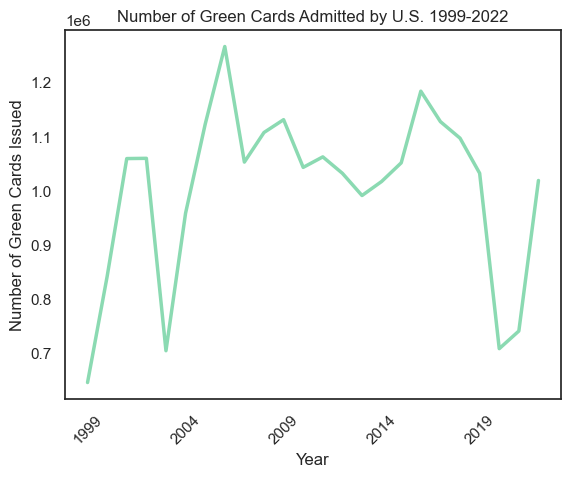

In [100]:
sns.lineplot(group_plot, x='variable', y='value').set(xlabel='Year', ylabel='Number of Green Cards Issued', title='Number of Green Cards Admitted by U.S. 1999-2022')

sns.set(style="white", palette="mako_r", rc={"lines.linewidth": 2.5})

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [101]:
grouped_legal.groupby(['Country']).sum().sort_values(by='value', ascending=False)

,variable,value
Country,,
All Countries (total),1999200020012002200320042005200620072008200920...,24043376.0
Americas,1999200020012002200320042005200620072008200920...,10265193.0
Asia,1999200020012002200320042005200620072008200920...,9022415.0
Central America,1999200020012002200320042005200620072008200920...,5056827.0
Mexico,1999200020012002200320042005200620072008200920...,3741039.0
...,...,...
French Guiana,1999200020012002200320042005200620072008200920...,59.0
Solomon Islands,1999200020012002200320042005200620072008200920...,57.0
U.S. Virgin Islands,1999200020012002200320042005200620072008200920...,55.0


### Question 2

In [102]:
immigrant_state.columns

Index(['Country', 'Total Population', 'Immigrant Population',
       'Immigrant Share of Total State Population', 'Year'],
      dtype='object')

In [103]:
state_pivot = pd.pivot_table(immigrant_state, values='Immigrant Share of Total State Population',
                             index='Country', aggfunc='mean')

state_pivot

,Immigrant Share of Total State Population
Country,
Alabama,6.766667
Alaska,8.333333
Arizona,13.583333
Arkansas,6.816667
California,25.250000
Colorado,9.316667
Connecticut,13.516667
Delaware,8.616667
District of Columbia,12.183333


In [104]:
state_from_pivot = state_pivot.reset_index()
state_from_pivot.rename(columns={'Country':'State'}, inplace=True)

In [105]:
state_from_pivot.columns

Index(['State', 'Immigrant Share of Total State Population'], dtype='object')

In [106]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}


state_from_pivot['Code'] = state_from_pivot['State'].map(code)

In [107]:
fig = px.choropleth(state_from_pivot, locations='Code', color=state_from_pivot['Immigrant Share of Total State Population'],
                           color_continuous_scale='tealgrn',
                           locationmode='USA-states',
                           scope="usa",
                           title='Percentage of Immigrant Share of Total Population by State'
                          )
fig.update_layout(width=1200, height=800, coloraxis_colorbar=dict(len=0.6),
                  margin=dict(l=0, r=0, t=0, b=0), coloraxis_colorbar_title='Percent Share')
fig.show()

In [108]:
top_5_state = state_from_pivot.sort_values(by=['Immigrant Share of Total State Population'], ascending=False)

print(top_5_state.head(5))

print(top_5_state.tail(5))

         State  Immigrant Share of Total State Population Code
4   California                                  25.250000   CA
32    New York                                  17.933333   NY
9      Florida                                  17.366667   FL
30  New Jersey                                  17.033333   NJ
11      Hawaii                                  15.666667   HI
            State  Immigrant Share of Total State Population Code
34   North Dakota                                   3.383333   ND
41   South Dakota                                   3.183333   SD
24    Mississippi                                   2.816667   MS
51        Wyoming                                   2.733333   WY
49  West Virginia                                   1.800000   WV


### Question 3

In [109]:
refugees.columns

Index(['Year', 'Annual Ceiling', 'Number of Admitted Refugees'], dtype='object')

In [110]:
refugees_clean = refugees.drop(range(5))

refugees_clean = refugees_clean.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

columns_to_float = ['Annual Ceiling', 'Number of Admitted Refugees']
refugees_clean[columns_to_float] = refugees_clean[columns_to_float].astype(float)

C:\Users\Max\AppData\Local\Temp\ipykernel_19740\1276996464.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [111]:
refugees_clean

,Year,Annual Ceiling,Number of Admitted Refugees
5,1980,231700.0,207116.0
6,1981,217000.0,159252.0
7,1982,140000.0,98096.0
8,1983,90000.0,61218.0
9,1984,72000.0,70393.0
10,1985,70000.0,67704.0
11,1986,67000.0,62146.0
12,1987,70000.0,64528.0
13,1988,87500.0,76483.0
14,1989,116500.0,107070.0


In [112]:
refugees_melted = pd.melt(refugees_clean, id_vars='Year', var_name='Variable', value_name='Value')

In [113]:
refugees_melted

,Year,Variable,Value
0,1980,Annual Ceiling,231700.0
1,1981,Annual Ceiling,217000.0
2,1982,Annual Ceiling,140000.0
3,1983,Annual Ceiling,90000.0
4,1984,Annual Ceiling,72000.0
...,...,...,...
85,2020,Number of Admitted Refugees,11814.0
86,2021,Number of Admitted Refugees,11411.0
87,2022,Number of Admitted Refugees,25465.0
88,2023,Number of Admitted Refugees,60014.0


In [114]:
group_plot_2 = group_plot

group_plot_2.rename(columns = {'variable':'Year', 'Country':'Variable', 'value':'Value'}, inplace=True)


line_plot_final = pd.concat([group_plot_2, refugees_melted])

line_plot_final.sort_values(by='Year', inplace=True)

line_plot_final

,Variable,Year,Value
45,Number of Admitted Refugees,1980,207116.0
0,Annual Ceiling,1980,231700.0
46,Number of Admitted Refugees,1981,159252.0
1,Annual Ceiling,1981,217000.0
47,Number of Admitted Refugees,1982,98096.0
...,...,...,...
42,Annual Ceiling,2022,125000.0
43,Annual Ceiling,2023,125000.0
88,Number of Admitted Refugees,2023,60014.0
44,Annual Ceiling,2024*,125000.0


c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



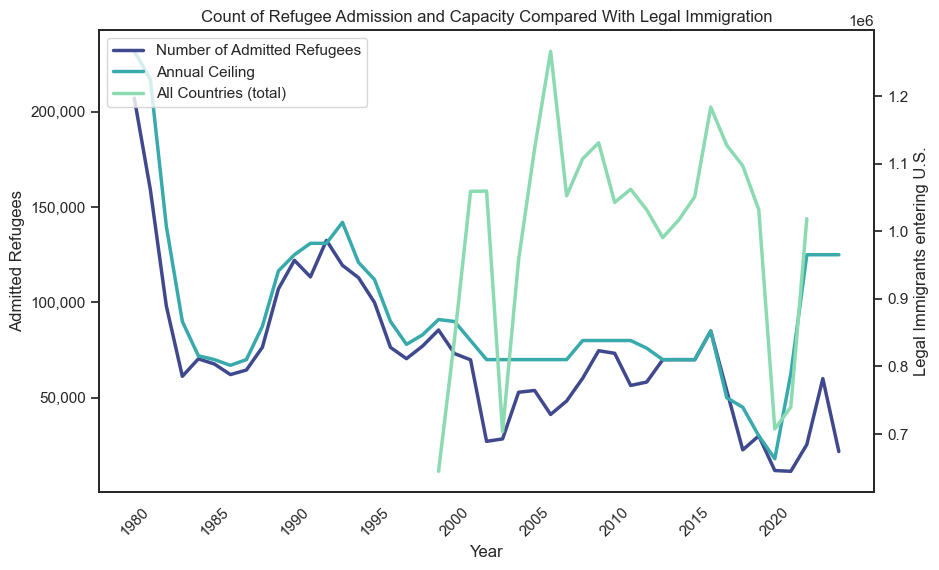

In [142]:
# Set style and palette
sns.set(style="white", palette="mako_r", rc={"lines.linewidth": 2.5})

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the main line plot on the primary y-axis
line_plot = sns.lineplot(x='Year', y='Value', hue='Variable', data=line_plot_final[line_plot_final['Variable'] != 'All Countries (total)'], ax=ax1, palette='mako')

# Set primary y-axis labels and title
line_plot.set(xlabel='Year', ylabel='Admitted Refugees', title='Count of Refugee Admission and Capacity Compared With Legal Immigration')

# Set x-axis major locator
line_plot.xaxis.set_major_locator(plt.MultipleLocator(5))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Format y-axis labels with commas
line_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot the line corresponding to the secondary axis on the secondary axis
sns.lineplot(x='Year', y='Value', hue='Variable', data=line_plot_final[line_plot_final['Variable'] == 'All Countries (total)'], ax=ax2, color='red')

# Set secondary y-axis labels
ax2.set_ylabel('Legal Immigrants entering U.S.')

# Get handles and labels for the primary axis
handles1, labels1 = ax1.get_legend_handles_labels()

# Get handles and labels for the secondary axis
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legends
handles = handles1 + handles2
labels = labels1 + labels2

# Display the legend
ax1.legend(handles, labels, loc='upper left')

# Hide the legend for ax2
ax2.get_legend().remove()

# Show the plot
plt.show()

### Question 4

In [116]:
unauthorized_estimates['Code'] = unauthorized_estimates['State'].map(code)

unauthorized_estimates = unauthorized_estimates.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

unauthorized_estimates['Number of Unauthorized Immigrants'].astype('float')

C:\Users\Max\AppData\Local\Temp\ipykernel_19740\3574495365.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0     11047000.0
1      2739000.0
2      1739000.0
3       835000.0
4       772000.0
5       440000.0
6       425000.0
7       339000.0
8       296000.0
9       273000.0
10      251000.0
11      246000.0
12      225000.0
13      209000.0
14      168000.0
15      162000.0
16      153000.0
17      128000.0
18      113000.0
19      108000.0
20      102000.0
21       91000.0
22       90000.0
23       89000.0
24       89000.0
25       88000.0
26       81000.0
27       70000.0
28       70000.0
29       69000.0
30       63000.0
31       62000.0
32       58000.0
33       51000.0
34       50000.0
35       46000.0
36       42000.0
37       37000.0
38       29000.0
39       25000.0
40       24000.0
41       24000.0
42       21000.0
43       11000.0
44       10000.0
45        7000.0
46        7000.0
47        5000.0
48        5000.0
49        4000.0
50        3000.0
51        3000.0
Name: Number of Unauthorized Immigrants, dtype: float64

In [117]:
unauthorized_estimates

,State,Number of Unauthorized Immigrants,State Share of the Total Unauthorized Immigrant Population,Code
0,United States,11047000,100.0,NaN
1,California,2739000,24.8,CA
2,Texas,1739000,15.7,TX
3,New York,835000,7.6,NY
4,Florida,772000,7.0,FL
5,New Jersey,440000,4.0,NJ
6,Illinois,425000,3.8,IL
7,Georgia,339000,3.1,GA
8,North Carolina,296000,2.7,NC
9,Arizona,273000,2.5,AZ


In [118]:
fig = px.choropleth(unauthorized_estimates, locations='Code', 
                    color=unauthorized_estimates['State Share of the Total Unauthorized Immigrant Population'],
                           color_continuous_scale='bluyl',
                           locationmode='USA-states',
                           scope="usa",
                           range_color=(0, 25),
                           title='Percentage of Unnathorized Immigrant Share of Total Population by State'
                          )
fig.update_layout(width=1200, height=800, coloraxis_colorbar=dict(len=0.6),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

In [119]:
value_to_drop = 'United States'

pie_plot = unauthorized_estimates[unauthorized_estimates['State'] != value_to_drop]

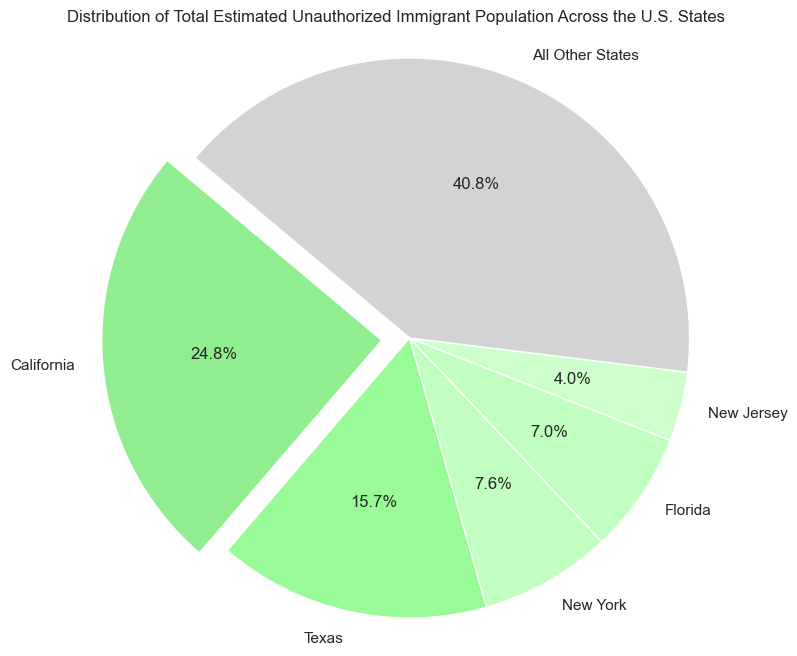

In [120]:
# Select top 5 rows and sum the rest
top_5 = pie_plot.head(5)
other = pd.DataFrame({
    'State': ['All Other States'],
    'State Share of the Total Unauthorized Immigrant Population': [pie_plot['State Share of the Total Unauthorized Immigrant Population'][5:].sum()]
})

# Concatenate top 5 and 'Other'
df = pd.concat([top_5, other])


colors = [(144/255, 238/255, 144/255), (152/255, 251/255, 152/255), 
          (193/255, 255/255, 193/255), (193/255, 255/255, 193/255), 
          (204/255, 255/255, 204/255), (211/255, 211/255, 211/255), 
          (220/255, 220/255, 220/255), (230/255, 230/255, 250/255), 
          (240/255, 248/255, 255/255), (245/255, 245/255, 220/255), 
          (250/255, 250/255, 210/255)]


# o block (250/255, 250/255, 210/255)


explode = [0.1 if df['State Share of the Total Unauthorized Immigrant Population'][i] == max(df['State Share of the Total Unauthorized Immigrant Population']) else 0 for i in range(len(df))]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(df['State Share of the Total Unauthorized Immigrant Population'], labels=df['State'], autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
plt.title('Distribution of Total Estimated Unauthorized Immigrant Population Across the U.S. States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

### Question 5

In [121]:
children

,State,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021,FY 2022,FY 2023 YTD*,FY 2014 - 2023 YTD* Total
0,United States,"53,515","27,840","52,147","42,497","34,953","72,837","16,837","107,686","127,447","101,871","637,630"
1,Alabama,786,808,870,598,736,"1,111",247,"1,946","2,378","1,821","11,301"
2,Alaska,4,2,5,3,-,4,-,4,6,6,34
3,Arizona,295,167,330,322,258,493,162,631,782,762,"4,202"
4,Arkansas,307,186,309,272,193,359,87,790,926,788,"4,217"
5,California,"5,831","3,629","7,381","6,268","4,675","8,447","2,225","10,773","13,730","10,073","73,032"
6,Colorado,426,248,427,379,313,714,172,"1,088","1,424","1,430","6,621"
7,Connecticut,552,206,454,412,332,959,260,"1,447","1,302","1,114","7,038"
8,Delaware,212,152,275,178,222,383,107,519,573,470,"3,091"
9,District of Columbia,375,201,432,294,138,322,48,307,421,312,"2,850"


In [122]:
children.columns

Index(['State', 'FY 2014', 'FY 2015', 'FY 2016', 'FY 2017', 'FY 2018',
       'FY 2019', 'FY 2020', 'FY 2021', 'FY 2022', 'FY 2023 YTD*',
       'FY 2014 - 2023 YTD* Total'],
      dtype='object')

In [123]:
children_clean = children.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

columns_to_float_2 = ['FY 2014', 'FY 2015', 'FY 2016', 'FY 2017', 'FY 2018',
       'FY 2019', 'FY 2020', 'FY 2021', 'FY 2022', 'FY 2023 YTD*',
       'FY 2014 - 2023 YTD* Total']

children_clean.replace('-', 0, inplace=True)
children_clean[columns_to_float_2] = children_clean[columns_to_float_2].astype(float)

C:\Users\Max\AppData\Local\Temp\ipykernel_19740\3240696893.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [124]:
children_clean

,State,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021,FY 2022,FY 2023 YTD*,FY 2014 - 2023 YTD* Total
0,United States,53515.0,27840.0,52147.0,42497.0,34953.0,72837.0,16837.0,107686.0,127447.0,101871.0,637630.0
1,Alabama,786.0,808.0,870.0,598.0,736.0,1111.0,247.0,1946.0,2378.0,1821.0,11301.0
2,Alaska,4.0,2.0,5.0,3.0,0.0,4.0,0.0,4.0,6.0,6.0,34.0
3,Arizona,295.0,167.0,330.0,322.0,258.0,493.0,162.0,631.0,782.0,762.0,4202.0
4,Arkansas,307.0,186.0,309.0,272.0,193.0,359.0,87.0,790.0,926.0,788.0,4217.0
5,California,5831.0,3629.0,7381.0,6268.0,4675.0,8447.0,2225.0,10773.0,13730.0,10073.0,73032.0
6,Colorado,426.0,248.0,427.0,379.0,313.0,714.0,172.0,1088.0,1424.0,1430.0,6621.0
7,Connecticut,552.0,206.0,454.0,412.0,332.0,959.0,260.0,1447.0,1302.0,1114.0,7038.0
8,Delaware,212.0,152.0,275.0,178.0,222.0,383.0,107.0,519.0,573.0,470.0,3091.0
9,District of Columbia,375.0,201.0,432.0,294.0,138.0,322.0,48.0,307.0,421.0,312.0,2850.0


In [125]:
unauthorized_estimates

,State,Number of Unauthorized Immigrants,State Share of the Total Unauthorized Immigrant Population,Code
0,United States,11047000,100.0,NaN
1,California,2739000,24.8,CA
2,Texas,1739000,15.7,TX
3,New York,835000,7.6,NY
4,Florida,772000,7.0,FL
5,New Jersey,440000,4.0,NJ
6,Illinois,425000,3.8,IL
7,Georgia,339000,3.1,GA
8,North Carolina,296000,2.7,NC
9,Arizona,273000,2.5,AZ


In [126]:
merged_children = pd.merge(children_clean, unauthorized_estimates[['State','Number of Unauthorized Immigrants']], on='State', how='left')

In [127]:
merged_children['Number of Unauthorized Immigrants'] = merged_children['Number of Unauthorized Immigrants'].astype('float')

In [128]:
merged_children['Ratio'] = (merged_children['FY 2014 - 2023 YTD* Total'] / merged_children['Number of Unauthorized Immigrants'])

In [129]:
merged_children.sort_values(by=['Ratio'], ascending=False, inplace=True)

In [130]:
top_3_children = merged_children.head(3)
bottom_3_children = merged_children.tail(8).iloc[-7:-4]

In [131]:
children_graph = pd.concat([top_3_children,bottom_3_children], axis=0, ignore_index=True)

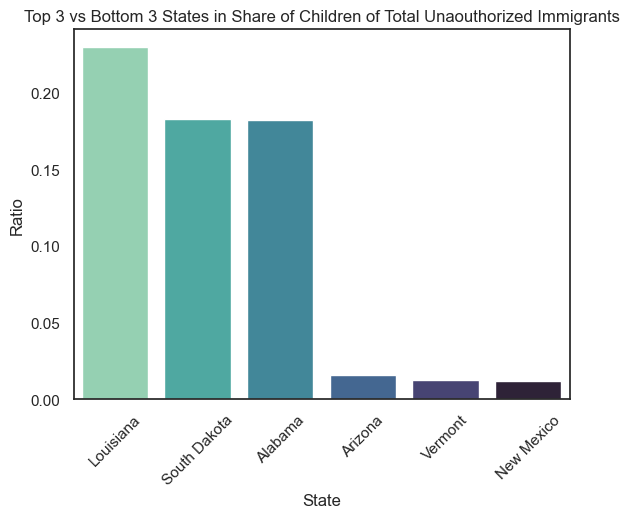

In [132]:
sns.barplot(children_graph, x='State', y='Ratio').set_title('Top 3 vs Bottom 3 States in Share of Children of Total Unaouthorized Immigrants')

plt.xticks(rotation=45);

# Question 6

In [133]:
df_cleaned

,Country,All Adults,Less than 9th Grade,9th-12th Grade,High School Diploma or Equivalent,Some College or Associate's Degree,Bachelor's Degree or Higher
0,U.S. Born,"189,038,000",2.0,5.0,27.0,30.0,36.0
1,All immigrants,"40,741,000",16.0,9.0,22.0,18.0,35.0
2,Recently Arrived Immigrants,"1,945,000",12.0,7.0,19.0,13.0,48.0
3,Mexico,"288,000",27.0,15.0,24.0,11.0,24.0
4,India,"215,000",3.0,3.0,4.0,4.0,86.0
5,China/Hong Kong,"94,000",9.0,4.0,17.0,11.0,60.0
6,Venezuela,"84,000",6.0,4.0,22.0,22.0,46.0
7,Cuba,"68,000",4.0,16.0,37.0,15.0,28.0
8,Colombia,"67,000",8.0,5.0,22.0,21.0,44.0
9,Brazil,"60,000",10.0,6.0,25.0,10.0,49.0


In [134]:
df_cleaned['Some_college_degree'] = df_cleaned['Some College or Associate\'s Degree'] + df_cleaned['Bachelor\'s Degree or Higher']

In [135]:
df_cleaned.sort_values('Some_college_degree', ascending=False)

,Country,All Adults,Less than 9th Grade,9th-12th Grade,High School Diploma or Equivalent,Some College or Associate's Degree,Bachelor's Degree or Higher,Some_college_degree
19,Japan,"30,000",2.0,0.0,4.0,9.0,85.0,94.0
36,France,"11,000",2.0,0.0,4.0,7.0,87.0,94.0
34,Taiwan,"13,000",0.0,1.0,5.0,6.0,88.0,94.0
16,Korea,"38,000",1.0,0.0,8.0,4.0,87.0,91.0
4,India,"215,000",3.0,3.0,4.0,4.0,86.0,90.0
33,Iran,"14,000",3.0,1.0,8.0,11.0,77.0,88.0
35,Turkey,"13,000",3.0,2.0,10.0,6.0,79.0,85.0
30,Russia,"16,000",2.0,1.0,13.0,13.0,71.0,84.0
25,Nigeria,"23,000",3.0,1.0,12.0,11.0,73.0,84.0
24,United Kingdom,"24,000",0.0,3.0,13.0,19.0,65.0,84.0


In [136]:
df_cleaned.replace({'Korea':'South Korea'}, inplace=True)

In [137]:
# Function to get continent from country name
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return None

# Add continent column to DataFrame
df_cleaned['Continent'] = df_cleaned['Country'].apply(get_continent)

In [138]:
df_cleaned.sort_values('Some_college_degree', ascending=False, inplace=True)

In [139]:
education_top_5 = df_cleaned.head(10)

education_bot_5 = df_cleaned.tail(10)

frames = (education_top_5, education_bot_5)

education_plot = pd.concat(frames)

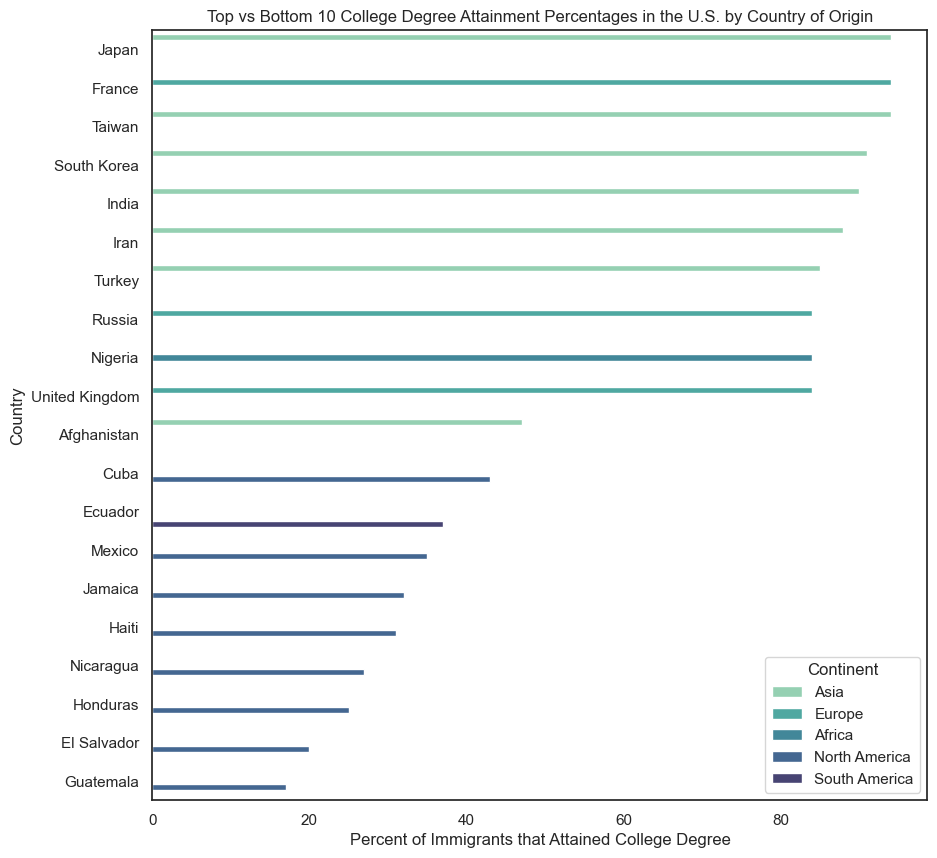

In [155]:
# Set the figure size
plt.figure(figsize=(10, 10))

sns.barplot(data=education_plot, y='Country', x='Some_college_degree', hue='Continent').set_title('Top vs Bottom 10 College Degree Attainment Percentages in the U.S. by Country of Origin')

plt.xlabel('Percent of Immigrants that Attained College Degree')

plt.show()

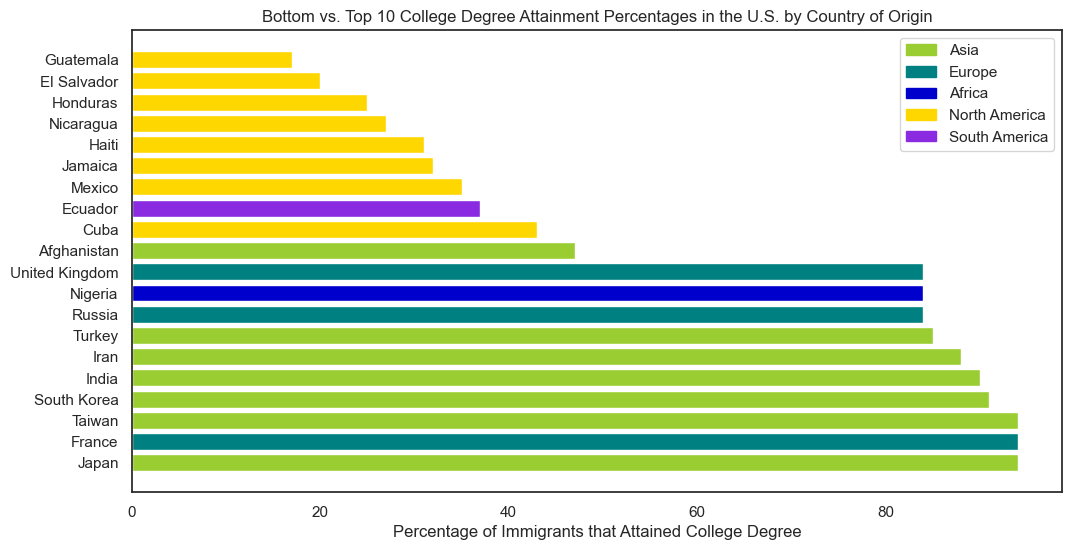

In [177]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define colors for each continent
continent_colors = {'Asia': 'yellowgreen', 'Europe': 'teal', 'Africa': 'mediumblue', 'North America': 'gold', 'South America': 'blueviolet', 'Oceania': 'brown'}

# Create the bar plot
bar_plot = plt.barh(education_plot['Country'], education_plot['Some_college_degree'], color=[continent_colors[cont] for cont in education_plot['Continent']])

# Set title
plt.title('Bottom vs. Top 10 College Degree Attainment Percentages in the U.S. by Country of Origin')

# Set xlabel
plt.xlabel('Percentage of Immigrants that Attained College Degree')

# Add legend for continent colors
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=continent_colors[cont], label=cont) for cont in education_plot['Continent'].unique()])

# Show the plot
plt.show()